# **Importing the initial needed libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Exploring the General information of the dataset** #

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# **Exploratory Data Analysis**

*Univariate Analysis*

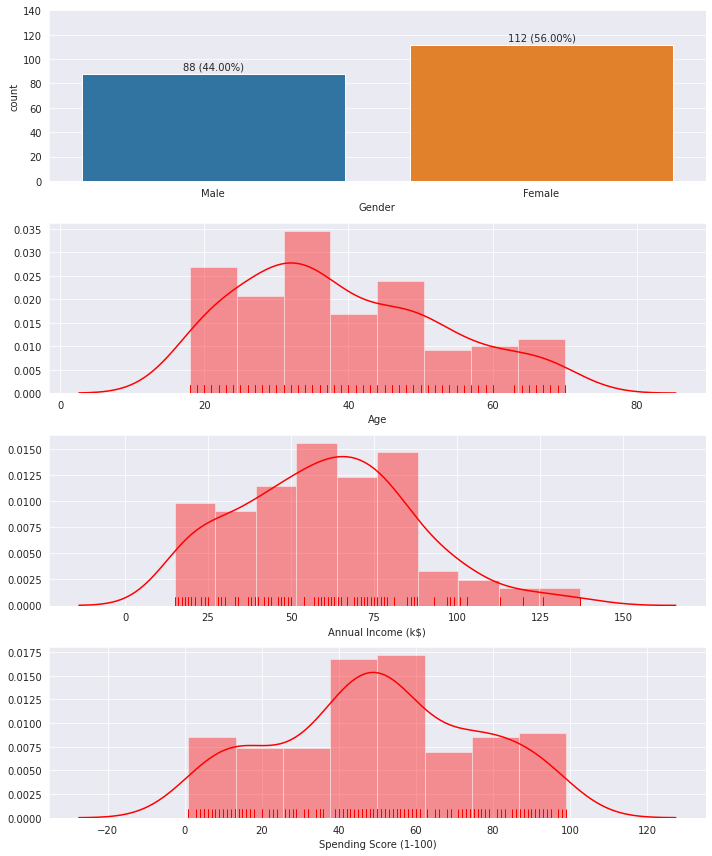

In [ ]:
#This is unsupervised learning so we don't have a dependent variable
# Checking the distribution of the features...
g, axes = plt.subplots(4,1,figsize=(10,12))

a=1
sns.set_style('whitegrid')
sns.countplot(df['Gender'],ax=axes[0])
axes[0].set_ylim(0,140)
total = float(len(df))
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{} ({:1.2f}%)'.format(height,height*100/total),
            ha="center") 
    
for col in df.columns[2:5]:
  sns.distplot(df[col],ax=axes[a], rug=True, color='red')
  a+=1

g.tight_layout()

In [ ]:
#There are 12 more females than male in the dataset
#Most of the age lies on the range of 20-40 yrs old
#Annual income dropped after ~85k
#Majority of the spending score lies between 40-60

*Bivariate Analsysis*

Text(0.5, 1.0, 'Spending Score according to Age')

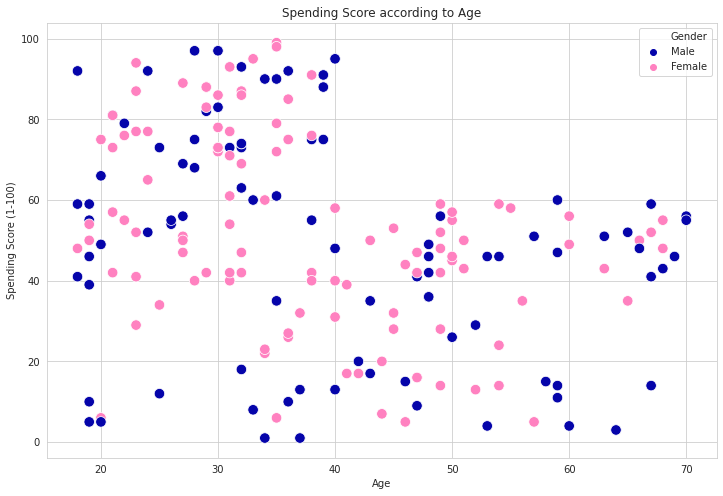

In [ ]:
plt.figure(figsize=(12,8))
g=sns.scatterplot(x='Age',y='Spending Score (1-100)', data=df, hue='Gender',palette=sns.xkcd_palette(['royal blue', 'pink']),s=110)
g.set_title('Spending Score according to Age')

Text(0.5, 1.0, 'Spending Score according to Annual Income')

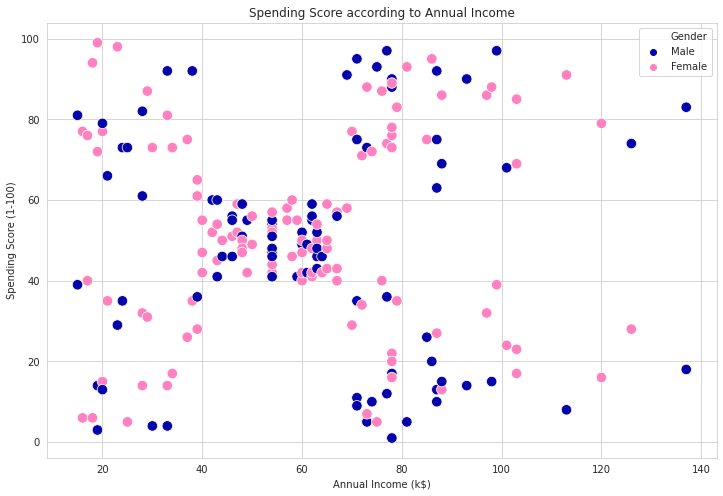

In [ ]:
#The Spending Score significantly dropped for those ages 40 and above
#Lower spending score group consist of mostly male samples
#Majority of the people with High Spending Score are also Women

plt.figure(figsize=(12,8))
g= sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df, hue='Gender',palette=sns.xkcd_palette(['royal blue', 'pink']),s=110)
g.set_title('Spending Score according to Annual Income')

Text(0.5, 1.0, 'Annual Income according to Age')

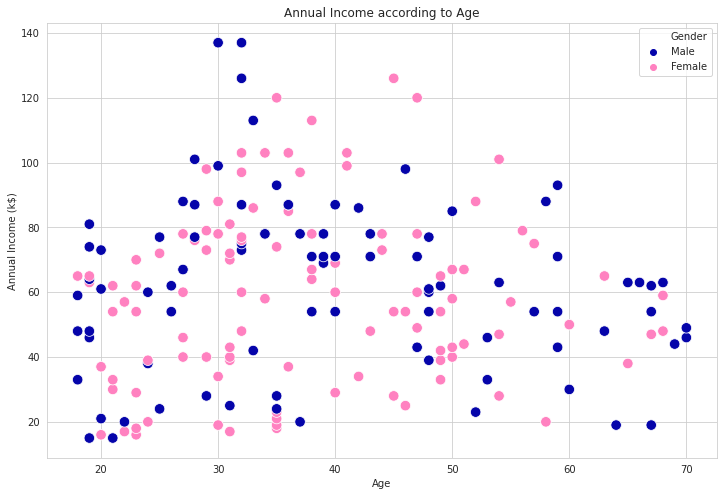

In [ ]:
#In this dataset, higher annual income doesn't mean higher spending score
#It is shown that the highest spending score lies on the 15-20k annual salary range and is also a female
plt.figure(figsize=(12,8))
g = sns.scatterplot(x='Age',y='Annual Income (k$)', data=df, hue='Gender',palette=sns.xkcd_palette(['royal blue', 'pink']),s=110)
g.set_title('Annual Income according to Age')

In [ ]:
#The top earners are in the range of 28-35 years old
#Lots of people below 20 years old earn at least 60k$ already

*Multivariate Analsysis*

***Converting the gender into dummy variables first before plotting the correlation heatmap and pairplot***

In [ ]:
#Encoding the Gender
dfnew = pd.get_dummies(df,columns=['Gender'],drop_first=True)

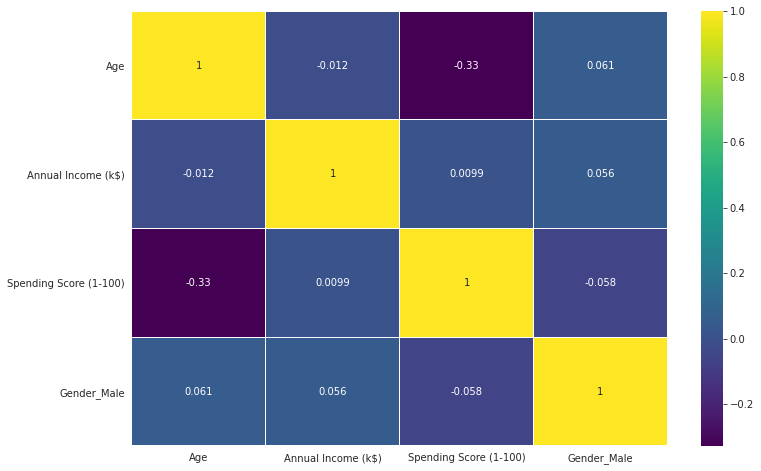

In [ ]:
#Plotting the correlation heatmap of the values

#Not including the Customer ID
plt.figure(figsize=(12,8))
sns.heatmap(dfnew[dfnew.columns[1:]].corr(),cmap='viridis', linewidth=0.1,linecolor='w',annot=True)

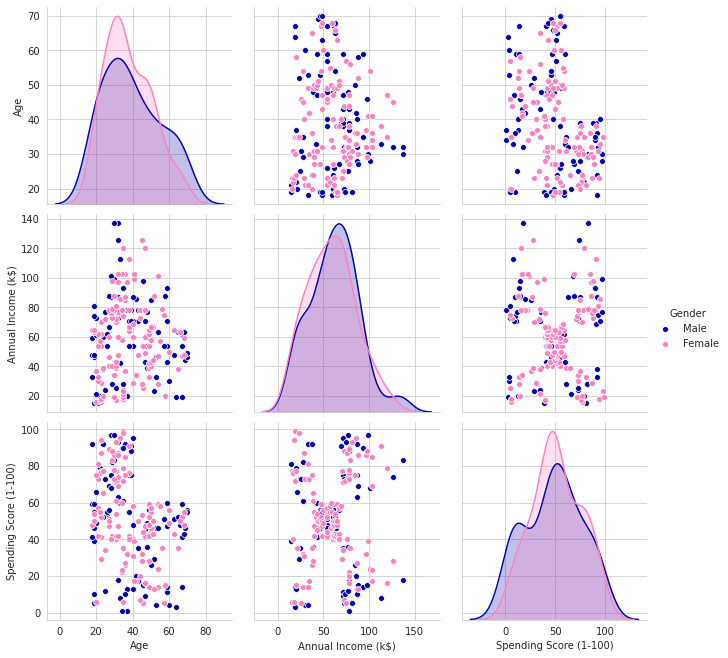

In [ ]:
#No features have high correlation with respect to another feature
sns.pairplot(df[df.columns[1:]],palette=sns.xkcd_palette(['royal blue', 'pink']),hue='Gender', height = 3, plot_kws={"s": 35})

In [ ]:
#Dropping the unneccesary feature(s): Customer ID
x = dfnew.drop('CustomerID',axis=1)


# **Clustering the Data**

***Using the KMeans Algorithm***

Text(0, 0.5, 'WCSS')

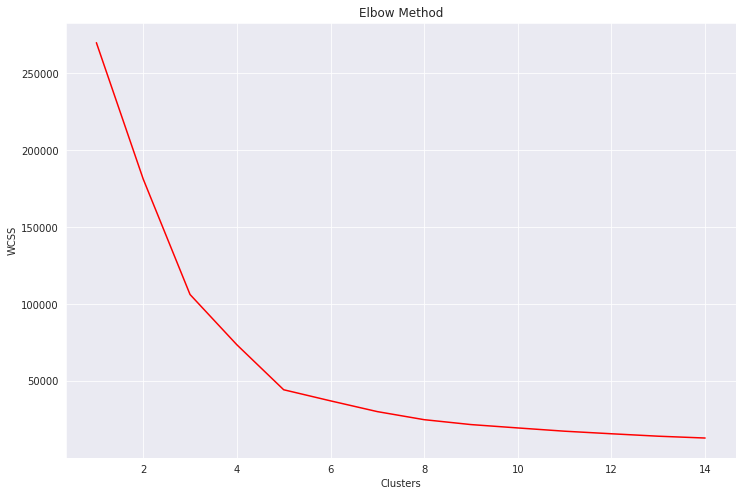

In [ ]:
#Using the Annual Income and Spending score as the clustering factors
#Using the elbow method to find that sudden change of drop value of the WCSS for the optimal number of clusters
xcluster = x[x.columns[1:3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 20, random_state = 42)
    km.fit(xcluster)
    wcss.append(km.inertia_)
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
g = sns.lineplot(x=range(1,15),y=wcss,color='r')
g.set_title('Elbow Method')
g.set_xlabel("Clusters")
g.set_ylabel("WCSS")

In [ ]:
#From the figure above, the wcss change from 5 to 6 is minimal compared to the previous changes in wcss
#Therefore, we are going to use 5 as the optimal number of clusters

In [ ]:
#Applying the optimal clusters to the kmeans
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, n_init = 20, random_state = 42)
kcluster = km.fit_predict(x)

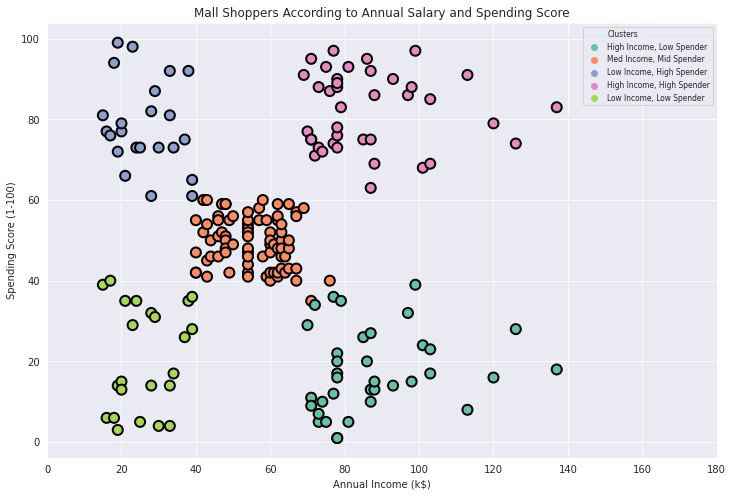

In [ ]:
#Plotting the clusters of the dataset
dfkmeans = df[df.columns[-2:]]
dfkmeans['Kmeans Cluster'] = kcluster
plt.figure(figsize=(12,8))
g = sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', data=dfkmeans, hue='Kmeans Cluster', palette='Set2', s=100, edgecolor='k',linewidth=2)
g.set_xlim(0,180)
g.set_title('Mall Shoppers According to Annual Salary and Spending Score')
g.legend(fontsize=7.5)
legend = g.legend_
legend.get_texts()[0].set_text('Clusters')
labels=['High Income, Low Spender','Med Income, Mid Spender','Low Income, High Spender','High Income, High Spender','Low Income, Low Spender']
for i, label in enumerate(labels):
    legend.get_texts()[i+1].set_text(label)

***Using the Hierarchical Clustering Algorithm***

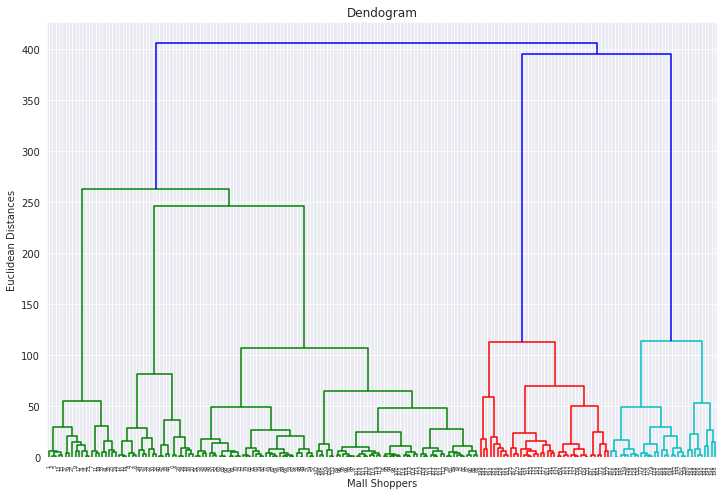

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,8))
dendogram = sch.dendrogram(sch.linkage(xcluster, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Mall Shoppers')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
#Based from the dendogram above, the largest vertical line that won't cross any
#horizontal line (y axis: from ~230 down to ~110) can be cut to produce 5 vertical lines
#Therefore, the optimal number of clusters is 5

#Applying Hierarchical Clustering...
#Applying HC 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward',affinity = "euclidean")
hcclusters = hc.fit_predict(xcluster)
dfkmeans['HC'] = hcclusters


In [ ]:
#checking if the Kmeans Cluster is the same as HC...
(dfkmeans['Kmeans Cluster']==dfkmeans['HC']).value_counts()

True     134
False     66
dtype: int64

In [ ]:
#Seems that 66 values are not the same..
#Plotting the HC and Kmeans Clustering Results

Text(0.5, 0.98, 'Mall Shoppers According to Annual Salary and Spending Score')

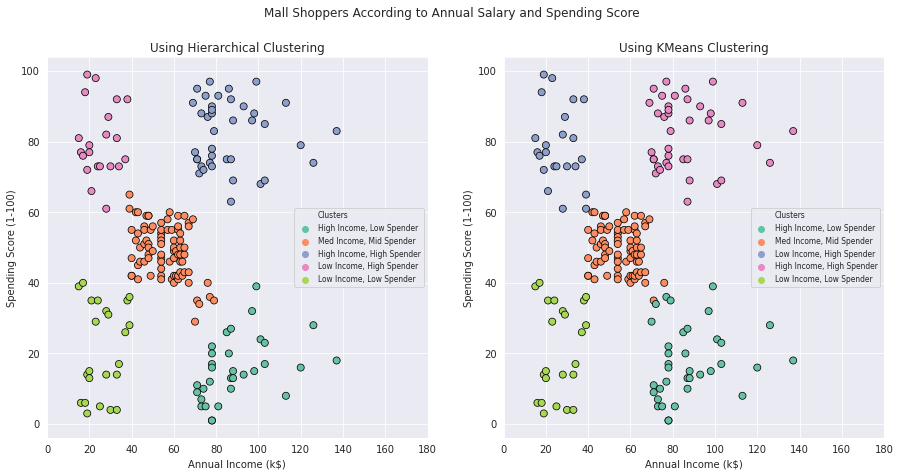

In [ ]:
c, axes=plt.subplots(1,2,figsize=(15,7))

g = sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', data=dfkmeans, hue='HC', palette='Set2', s=50, edgecolor='k',ax=axes[0])
axes[0].set_xlim(0,180)
axes[0].set_title('Using Hierarchical Clustering')
axes[0].legend(fontsize=7.5)
legend1 = axes[0].legend_
legend1.get_texts()[0].set_text('Clusters')
labels1=['High Income, Low Spender','Med Income, Mid Spender','High Income, High Spender','Low Income, High Spender','Low Income, Low Spender']
for i, label1 in enumerate(labels1):
    legend1.get_texts()[i+1].set_text(label1)

g1 = sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', data=dfkmeans, hue='Kmeans Cluster', palette='Set2', s=50, edgecolor='k',ax=axes[1])
axes[1].set_xlim(0,180)
axes[1].set_title('Using KMeans Clustering')
axes[1].legend(fontsize=7.5)
legend2 = axes[1].legend_
legend2.get_texts()[0].set_text('Clusters')
labels2=['High Income, Low Spender','Med Income, Mid Spender','Low Income, High Spender','High Income, High Spender','Low Income, Low Spender']
for i, label2 in enumerate(labels2):
    legend2.get_texts()[i+1].set_text(label2)
c.suptitle('Mall Shoppers According to Annual Salary and Spending Score')

In [ ]:
#Changes can be seen on the bottom right part of the middle cluster
#and upper left part of the middle cluster

#Segments Analsysis
#High Income - High Spender = People that really have the capacity to spend lots of money on a shopping mall
#High Income - Low Spender = People that place their money on things other than shopping
#Med Income - Med Spender = Average people
#Low Income - High Spender = People that spend lots of money but don't have high Income. Perhaps those people don't have family yet so they put their salary on shopping regularly
#Low Income - Low Spender = People who tend to save their money by preventing shopping because of their low annual income


Text(0, 0.5, 'WCSS')

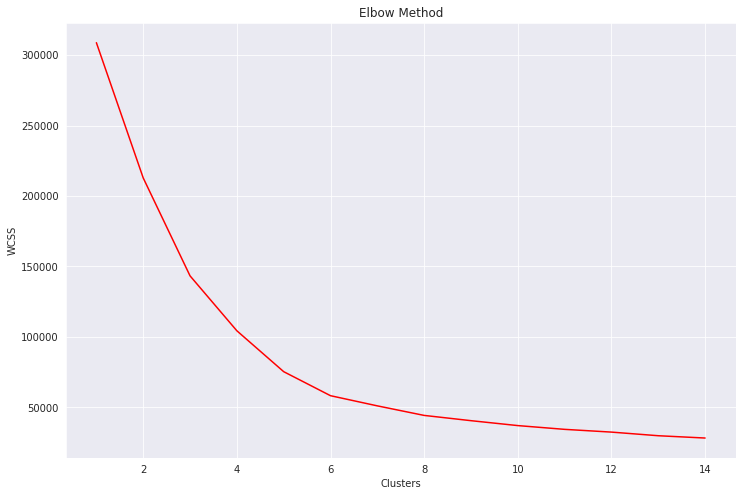

In [ ]:
#Using Age, Annual Salary, and Spending Score as the clustering factors...
xcluster3d = df[df.columns[-3:]].values
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 20, random_state = 42)
    km.fit(xcluster3d)
    wcss.append(km.inertia_)
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
g = sns.lineplot(x=range(1,15),y=wcss,color='r')
g.set_title('Elbow Method')
g.set_xlabel("Clusters")
g.set_ylabel("WCSS")


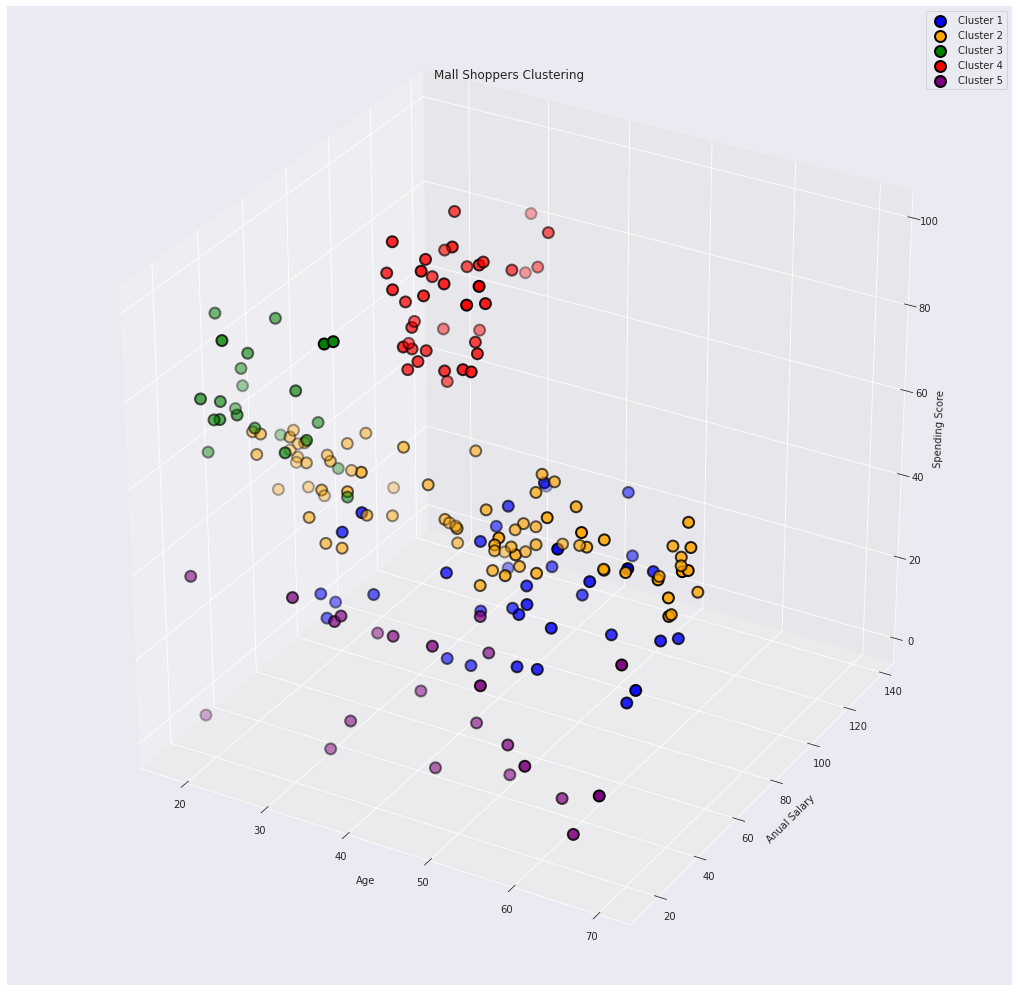

In [ ]:
#Our optimal clusters are 5 again...
#Applying the optimal clusters to the kmeans
km3d = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, n_init = 20, random_state = 42)
kcluster3d = km3d.fit_predict(x)
#Plotting using 3d Matplotlib
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (18,18))
g = fig.add_subplot(111, projection='3d')
g.scatter(xcluster3d[kcluster3d == 0,0],xcluster3d[kcluster3d == 0,1],xcluster3d[kcluster3d == 0,2], s = 120 , color = 'blue', label = "Cluster 1",edgecolor='k',linewidth=2)
g.scatter(xcluster3d[kcluster3d == 1,0],xcluster3d[kcluster3d == 1,1],xcluster3d[kcluster3d == 1,2], s = 120 , color = 'orange', label = "Cluster 2",edgecolor='k',linewidth=2)
g.scatter(xcluster3d[kcluster3d == 2,0],xcluster3d[kcluster3d == 2,1],xcluster3d[kcluster3d == 2,2], s = 120 , color = 'green', label = "Cluster 3",edgecolor='k',linewidth=2)
g.scatter(xcluster3d[kcluster3d == 3,0],xcluster3d[kcluster3d == 3,1],xcluster3d[kcluster3d == 3,2], s = 120 , color = 'red', label = "Cluster 4",edgecolor='k',linewidth=2)
g.scatter(xcluster3d[kcluster3d == 4,0],xcluster3d[kcluster3d == 4,1],xcluster3d[kcluster3d == 4,2], s = 120 , color = 'purple', label = "Cluster 5",edgecolor='k',linewidth=2)
g.set_xlabel('Age')
g.set_ylabel('Anual Salary')
g.set_zlabel('Spending Score')
g.set_title('Mall Shoppers Clustering')
g.legend()